In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv('Cancer_Data.csv')
data.head()
data = data.drop('Unnamed: 32', axis=1)

DATASET INFO AND DATA CLEANING

In [3]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.drop('id',axis=1,inplace=True)

FEATURE ENCODING AND DATA VISUALIZATION

In [6]:
data.groupby("diagnosis").mean().T.style.highlight_max(subset = None,
                                                       color = 'lightgreen',
                                                       axis = 1, props = None)

diagnosis,B,M
radius_mean,12.146524,17.462830
texture_mean,17.914762,21.604906
perimeter_mean,78.075406,115.365377
area_mean,462.790196,978.376415
smoothness_mean,0.092478,0.102898
compactness_mean,0.080085,0.145188
concavity_mean,0.046058,0.160775
concave points_mean,0.025717,0.087990
symmetry_mean,0.174186,0.192909
fractal_dimension_mean,0.062867,0.062680


In [7]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


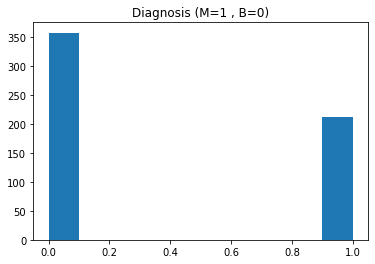

In [8]:
plt.hist(data['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [9]:
features_mean=list(data.columns[1:11])
# split dataframe into two based on diagnosis
dfM=data[data['diagnosis'] ==1]
dfB=data[data['diagnosis'] ==0]

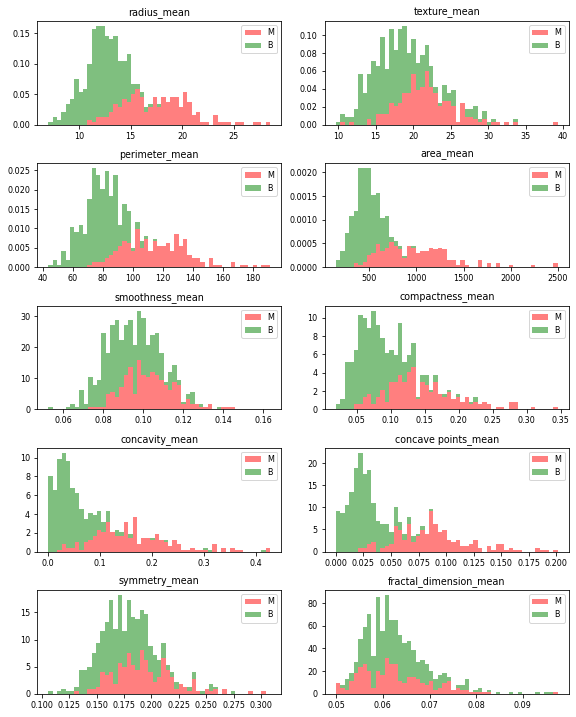

In [10]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

The average values of cell radius, perimeter, area, compaction, concavity, and depression can be used in cancer classification. Higher values of these parameters tend to show  correlation with malignancies.
Mean values of texture, smoothness, symmetry, or crack size do not indicate any particular preference of one diagnosis over the other. None of the graphs had any notable large outliers that needed further cleaning.

In [11]:
correlation_matrix = data.corr()

# Convertire la matrice di correlazione in un DataFrame
correlation_table = pd.DataFrame(correlation_matrix.unstack().sort_values(ascending=False), columns=['Correlation'])

# Rimuovere le correlazioni duplicate e quelle con se stesse
correlation_table = correlation_table.loc[correlation_table.index.get_level_values(0) != correlation_table.index.get_level_values(1)]

# Resetta gli indici
correlation_table.reset_index(inplace=True)

print(correlation_table.head(50))


                 level_0               level_1  Correlation
0         perimeter_mean           radius_mean     0.997855
1            radius_mean        perimeter_mean     0.997855
2           radius_worst       perimeter_worst     0.993708
3        perimeter_worst          radius_worst     0.993708
4            radius_mean             area_mean     0.987357
5              area_mean           radius_mean     0.987357
6         perimeter_mean             area_mean     0.986507
7              area_mean        perimeter_mean     0.986507
8             area_worst          radius_worst     0.984015
9           radius_worst            area_worst     0.984015
10            area_worst       perimeter_worst     0.977578
11       perimeter_worst            area_worst     0.977578
12          perimeter_se             radius_se     0.972794
13             radius_se          perimeter_se     0.972794
14       perimeter_worst        perimeter_mean     0.970387
15        perimeter_mean       perimeter

VARIABLES' DEFINITION AND SCALING

In [12]:
y = data["diagnosis"]
X = data.drop('diagnosis',axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

BUILDING ANN

In [15]:
ann=tf.keras.models.Sequential()

##adding input and first hidden layer
ann.add(tf.keras.layers.Dense(units=30,input_shape=(30,),activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
#adding another layer
ann.add(tf.keras.layers.Dense(units=20,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))

#adding another layer
ann.add(tf.keras.layers.Dense(units=20,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
#adding output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [16]:
ann.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
14/14 [==============================] - 2s 4ms/step - loss: 0.7097 - accuracy: 0.6197
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.6667
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7394
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4946 - accuracy: 0.7770
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8662
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3386 - accuracy: 0.8873
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2729 - accuracy: 0.9272
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2105 - accuracy: 0.9484
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2051 - accuracy: 0.9390
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.1798 - accuracy: 0.9460
Epoch 11/

In [18]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
89     0
199    1
411    0
18     1
390    0
Name: diagnosis, Length: 143, dtype: int64

In [19]:
ann.predict(X_test)

5/5 [==============================] - 0s 4ms/step


array([[7.13129761e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [3.74853499e-08],
       [6.23515373e-09],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99904573e-01],
       [7.48016000e-01],
       [2.36283704e-08],
       [2.21058633e-02],
       [9.99973536e-01],
       [5.50835503e-05],
       [9.99923646e-01],
       [3.78158127e-09],
       [1.00000000e+00],
       [8.74314381e-08],
       [5.09382758e-10],
       [1.39392400e-15],
       [1.00000000e+00],
       [2.01182687e-04],
       [6.68025677e-06],
       [1.00000000e+00],
       [8.92769858e-09],
       [2.05217205e-07],
       [8.88604555e-12],
       [5.32540323e-09],
       [6.83905819e-05],
       [4.50552898e-06],
       [1.00000000e+00],
       [3.51749598e-08],
       [2.72834505e-10],
       [3.24207647e-08],
       [6.04709612e-06],
       [1.41422429e-10],
       [1.99643324e-08],
       [9.98076797e-01],
       [6.28586974e-07],
       [1.00000000e+00],
       [3.56366532e-03],


In [20]:
y_predict = ann.predict(X_test)
y_predict = (y_predict > 0.5)

# Converti y_test in un array NumPy e poi usa reshape
y_test_array = y_test.values
y_predict_array = y_predict.reshape(len(y_predict), 1)

# Concatena i due array
result = np.concatenate((y_predict_array, y_test_array.reshape(len(y_test_array), 1)), axis=1)
print(result)


5/5 [==============================] - 0s 4ms/step
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 

ACCURACY OF THE MODEL

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_predict)
print(cm)
accuracy_score(y_test,y_predict)

[[86  3]
 [ 1 53]]


0.972027972027972

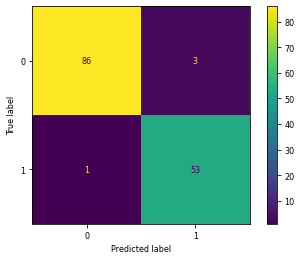

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp =ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()